In [115]:
from preprocessing_code import *

In [116]:
ds = load_dataset(file_path="../data/raw/era5_ro_1981_2024_land_monthly_means.nc")
print(ds)


<xarray.Dataset> Size: 47MB
Dimensions:     (valid_time: 528, latitude: 47, longitude: 95)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 4kB 1981-01-01 ... 2024-12-01
  * latitude    (latitude) float64 376B 48.22 48.12 48.02 ... 43.82 43.72 43.62
  * longitude   (longitude) float64 760B 20.26 20.36 20.46 ... 29.46 29.56 29.66
    expver      (valid_time) <U4 8kB ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 9MB ...
    swvl1       (valid_time, latitude, longitude) float32 9MB ...
    ssrd        (valid_time, latitude, longitude) float32 9MB ...
    pev         (valid_time, latitude, longitude) float32 9MB ...
    tp          (valid_time, latitude, longitude) float32 9MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Med

In [117]:
print(type(ds))

<class 'xarray.core.dataset.Dataset'>


In [118]:
ds.data_vars

Data variables:
    t2m      (valid_time, latitude, longitude) float32 9MB ...
    swvl1    (valid_time, latitude, longitude) float32 9MB ...
    ssrd     (valid_time, latitude, longitude) float32 9MB ...
    pev      (valid_time, latitude, longitude) float32 9MB ...
    tp       (valid_time, latitude, longitude) float32 9MB ...

In [119]:
ds.coords

Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 4kB 1981-01-01 ... 2024-12-01
  * latitude    (latitude) float64 376B 48.22 48.12 48.02 ... 43.82 43.72 43.62
  * longitude   (longitude) float64 760B 20.26 20.36 20.46 ... 29.46 29.56 29.66
    expver      (valid_time) <U4 8kB ...

In [120]:
for var_name in ds.data_vars:
    var_data = ds[var_name]
    has_nans = var_data.isnull().any()

    print(f"{var_name}: {'has nule values' if has_nans else 'no nule values'}")


t2m: has nule values
swvl1: has nule values
ssrd: has nule values
pev: has nule values
tp: has nule values


In [121]:
for var_name in ds.data_vars:
    var_data = ds[var_name]
    missing_mask = var_data.isnull()

    if missing_mask.any():
        example = missing_mask.where(missing_mask, drop=True).isel(valid_time=0)
        print(f"\n{var_name}: has nule values. Example:{example}")



t2m: has nule values. Example:<xarray.DataArray 't2m' (latitude: 20, longitude: 12)> Size: 2kB
array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1., nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.],
       [nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan,  1.],
       [nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan,  1.],
       [nan, nan, nan,  1.,  1.,  1., nan, nan, nan,  1.,  1.,  1.],
       [nan, nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [nan, nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [nan, nan, nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [nan, nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [nan, nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       

In [122]:
print("Latitude:")
print("  Min:", ds['latitude'].min().item())
print("  Max:", ds['latitude'].max().item())

print("Longitude:")
print("  Min:", ds['longitude'].min().item())
print("  Max:", ds['longitude'].max().item())


Latitude:
  Min: 43.618
  Max: 48.219
Longitude:
  Min: 20.262
  Max: 29.662


Here I noticed that latitude and longitude do not fall within the min/max limits – latitude: 20, longitude: 12 → TO BE CHECKED

latitude (latitude) float64 160B 45.72 45.62 45.52 ... 43.82 43.72 43.62

longitude (longitude) float64 96B 28.56 28.66 28.76 ... 29.46 29.56 29.66

UPDATE: it is normal not to have the full interval from max to min (only from 45 to 43, for example) because we only have a mask, not the entire variable.

In [123]:
import numpy as np

unique_vals = np.unique(ds['t2m'].values[~np.isnan(ds['t2m'].values)])
print(unique_vals)


[258.77026 258.9331  258.95264 ... 302.39014 302.44897 302.48926]


Here I wanted to check why above I only had NaN and 1 values. I later realized that this happens because a mask is being used.

In [124]:
print(ds['t2m'].isel(valid_time=0))


<xarray.DataArray 't2m' (latitude: 47, longitude: 95)> Size: 18kB
array([[268.41968, 268.31738, 268.30322, ..., 269.15186, 269.23218, 269.30518],
       [268.6521 , 268.25708, 268.1621 , ..., 269.25415, 269.32788, 269.3982 ],
       [269.05054, 268.79688, 268.63037, ..., 269.33398, 269.40503, 269.4724 ],
       ...,
       [268.4204 , 268.4922 , 268.687  , ...,       nan,       nan,       nan],
       [267.95264, 267.80176, 267.93726, ...,       nan,       nan,       nan],
       [267.1787 , 266.92725, 266.93628, ...,       nan,       nan,       nan]],
      dtype=float32)
Coordinates:
    number      int64 8B ...
    valid_time  datetime64[ns] 8B 1981-01-01
  * latitude    (latitude) float64 376B 48.22 48.12 48.02 ... 43.82 43.72 43.62
  * longitude   (longitude) float64 760B 20.26 20.36 20.46 ... 29.46 29.56 29.66
    expver      <U4 16B ...
Attributes: (12/31)
    GRIB_paramId:                             167
    GRIB_dataType:                            fc
    GRIB_numberOfPoints: 

In [125]:
for var_name in ds.data_vars:
    var_data = ds[var_name]
    missing_mask = var_data.isnull()

    if missing_mask.any():
        example_coords = missing_mask.where(missing_mask, drop=True).stack(z=missing_mask.dims).squeeze().dropna(
            dim='z').isel(z=0)
        coords_dict = {dim: example_coords[dim].item() for dim in example_coords.dims}

        print(f"\n{var_name}: has nule values at:")
        print(coords_dict)
        print("Value at selected point:")
        print(var_data.sel(**coords_dict))



t2m: has nule values at:
{}
Value at selected point:
<xarray.DataArray 't2m' (valid_time: 528, latitude: 47, longitude: 95)> Size: 9MB
array([[[268.41968, 268.31738, ..., 269.23218, 269.30518],
        [268.6521 , 268.25708, ..., 269.32788, 269.3982 ],
        ...,
        [267.95264, 267.80176, ...,       nan,       nan],
        [267.1787 , 266.92725, ...,       nan,       nan]],

       [[272.57983, 272.42065, ..., 271.51953, 271.56055],
        [272.77148, 272.27075, ..., 271.61987, 271.6604 ],
        ...,
        [272.16333, 271.97144, ...,       nan,       nan],
        [271.30518, 271.021  , ...,       nan,       nan]],

       ...,

       [[275.0459 , 274.97534, ..., 276.1709 , 276.22607],
        [275.1704 , 274.98584, ..., 276.24487, 276.3125 ],
        ...,
        [276.55933, 276.44238, ...,       nan,       nan],
        [275.8872 , 275.71143, ...,       nan,       nan]],

       [[274.2517 , 274.18677, ..., 274.22168, 274.271  ],
        [274.33618, 274.12866, ..., 274

In [126]:
for var_name in ds.data_vars:
    var_data = ds[var_name]
    num_nan = var_data.isnull().sum().item()
    total = var_data.size
    print(f"{var_name}: {num_nan} NaN out of {total} total values ({100 * num_nan / total:.2f}%)")


t2m: 76560 NaN out of 2357520 total values (3.25%)
swvl1: 76560 NaN out of 2357520 total values (3.25%)
ssrd: 76560 NaN out of 2357520 total values (3.25%)
pev: 76560 NaN out of 2357520 total values (3.25%)
tp: 76560 NaN out of 2357520 total values (3.25%)


In [127]:
from matplotlib import pyplot as plt

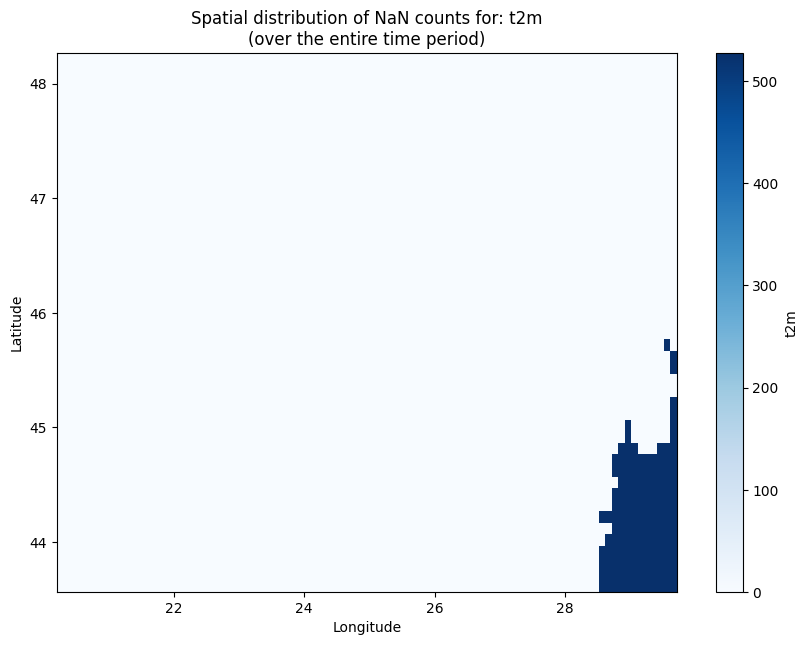

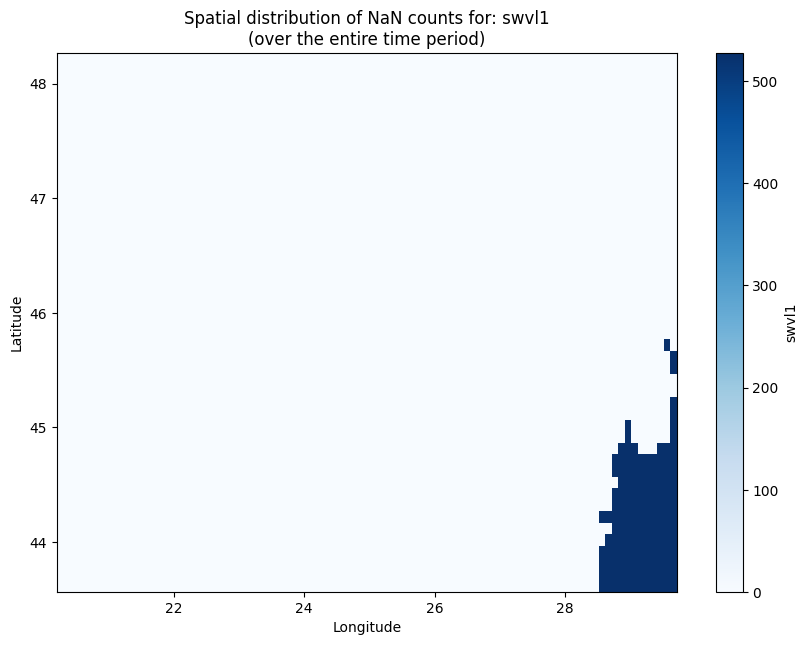

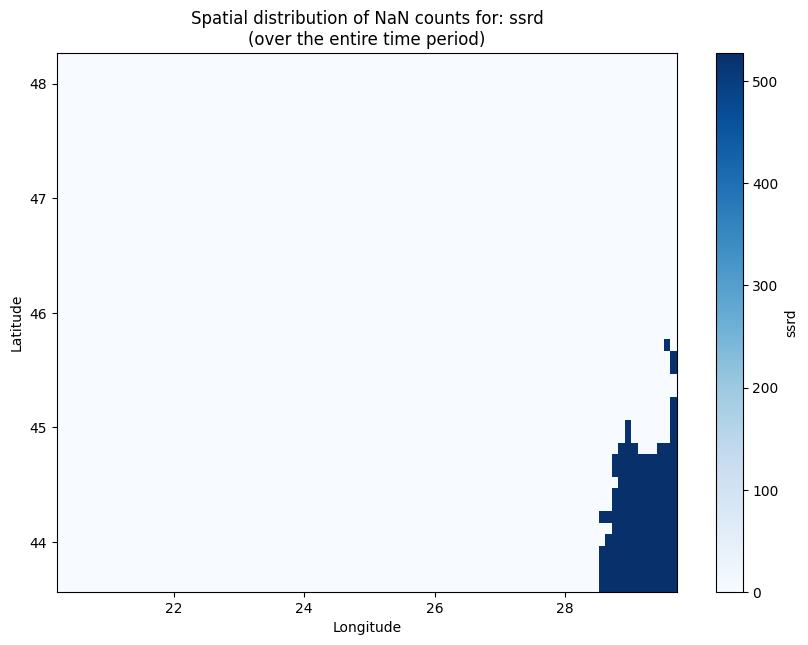

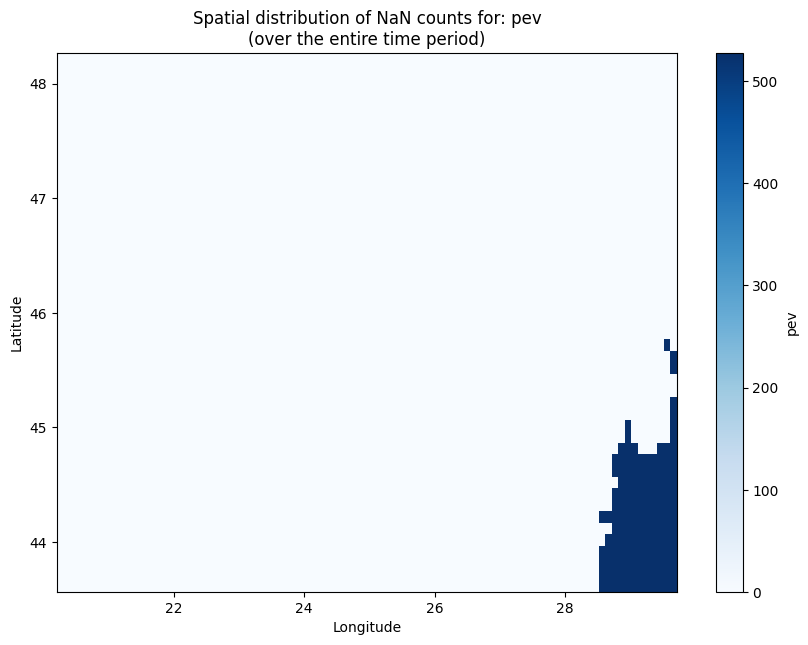

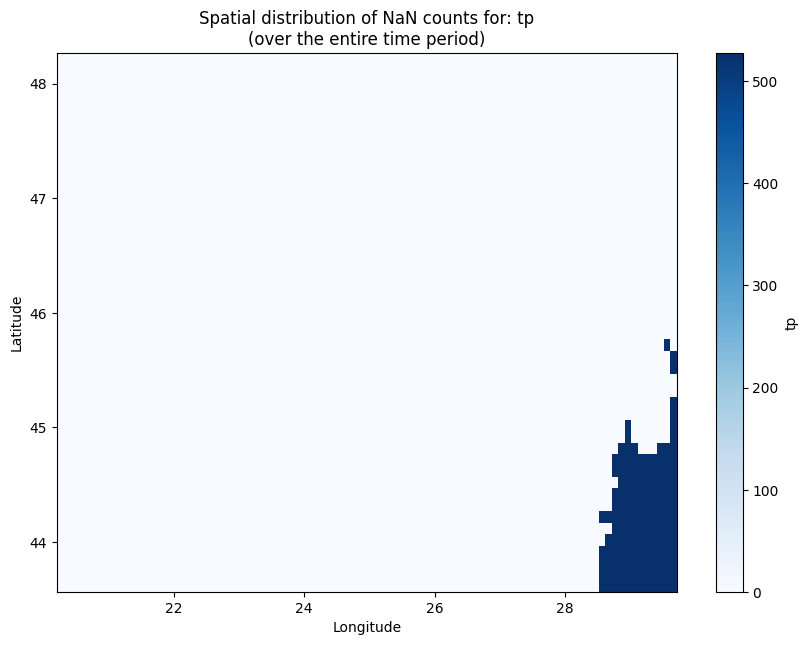

In [128]:
for var_name in ds.data_vars:
    # Calculate the proportion of time each grid cell is NaN
    # or the total number of NaNs per grid cell
    # isnull() returns True (1) for NaN and False (0) for non-NaN
    spatial_nan_frequency = ds[var_name].isnull().sum(dim='valid_time')

    # Check if there are any NaN values before plotting
    if spatial_nan_frequency.sum() > 0:  # Total sum of NaN frequencies
        plt.figure(figsize=(10, 7))
        spatial_nan_frequency.plot(cmap='Blues')
        plt.title(f'Spatial distribution of NaN counts for: {var_name}\n(over the entire time period)')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.show()
    else:
        # Even if there are no NaNs, we could display this information,
        # but in this context, we skip.
        # print(f"Variable {var_name} contains no NaN values for generating a spatial NaN frequency map.")
        pass  # Do nothing if there are no NaNs

This heatmap shows the areas where NULL values appear for the variables, based on latitude and longitude. I realized that in the bounding box I used for Romania, I also included a portion of the Black Sea, where no measurements were taken over the years, which is why NULL values appear. This means that we can remove them from the dataset.

In [129]:
for var_name in ds.data_vars:
    print(var_name)

t2m
swvl1
ssrd
pev
tp


In [130]:
import numpy as np

valid_mask = ~np.isnan(ds['t2m']).all(dim='valid_time')
valid_points = ds['t2m'].where(valid_mask)

data_valid = ds['t2m'].where(valid_mask).stack(points=("latitude", "longitude")).dropna(dim="points", how="all")


In [131]:
data_valid

<xarray.DataArray 't2m' (valid_time: 528, points: 4320)> Size: 9MB
array([[268.41968, 268.31738, 268.30322, ..., 273.13574, 273.7517 ,
        274.36206],
       [272.57983, 272.42065, 272.3374 , ..., 275.2744 , 275.76636,
        276.20996],
       [279.07007, 278.8545 , 278.78687, ..., 279.48975, 279.66138,
        279.8518 ],
       ...,
       [282.67114, 282.5747 , 282.57202, ..., 286.76123, 287.1787 ,
        287.5874 ],
       [275.0459 , 274.97534, 274.9541 , ..., 280.05298, 280.65332,
        281.24902],
       [274.2517 , 274.18677, 274.17578, ..., 278.51   , 279.021  ,
        279.5288 ]], dtype=float32)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 4kB 1981-01-01 ... 2024-12-01
    expver      (valid_time) <U4 8kB ...
  * points      (points) object 35kB MultiIndex
  * latitude    (points) float64 35kB 48.22 48.22 48.22 ... 43.62 43.62 43.62
  * longitude   (points) float64 35kB 20.26 20.36 20.46 ... 28.26 28.36 28.46
Attributes: (12/31)
    GRIB_paramId:                             167
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      4465
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_gridType:                            regular_ll
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [132]:
num_nan = data_valid.isnull().sum().item()
total = data_valid.size
print(f"{'t2m'}: {num_nan} NaN out of {total} total values ({100 * num_nan / total:.2f}%)")

t2m: 0 NaN out of 2280960 total values (0.00%)


In [133]:
var_data = ds['t2m']
num_nan = var_data.isnull().sum().item()
total = var_data.size
print(f"{'t2m'}: {num_nan} NaN out of {total} total values ({100 * num_nan / total:.2f}%)")


t2m: 76560 NaN out of 2357520 total values (3.25%)


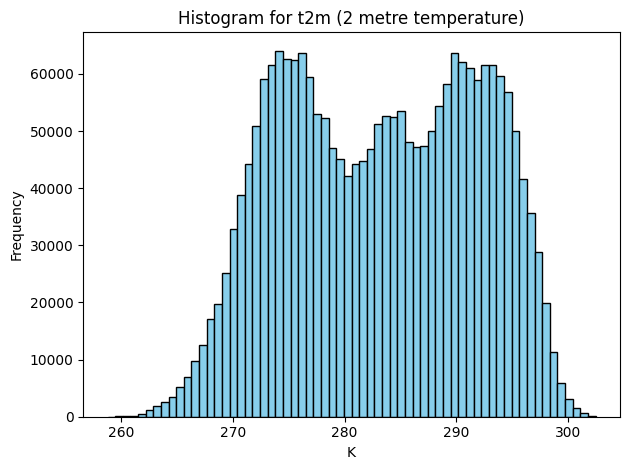

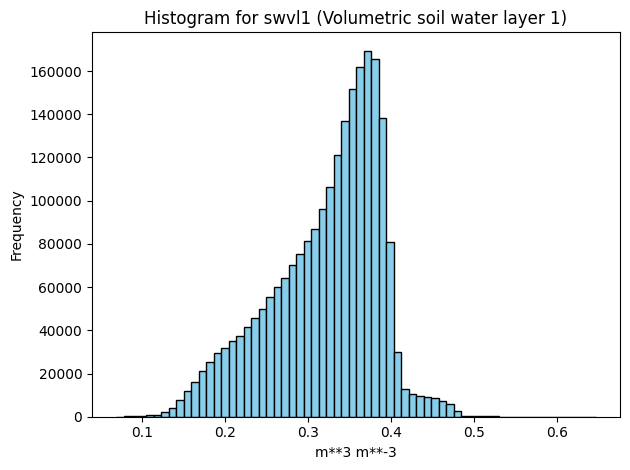

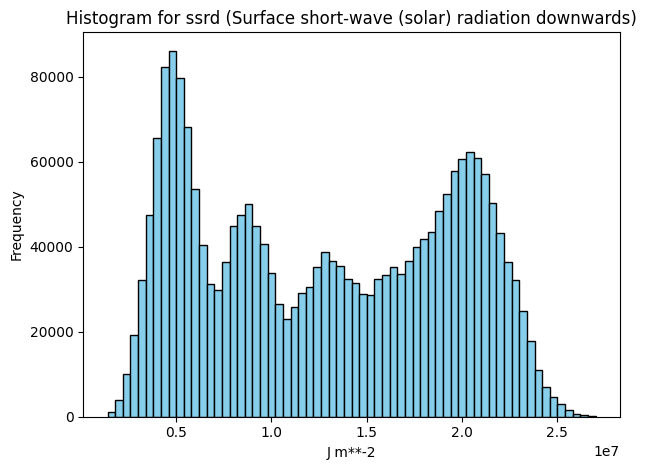

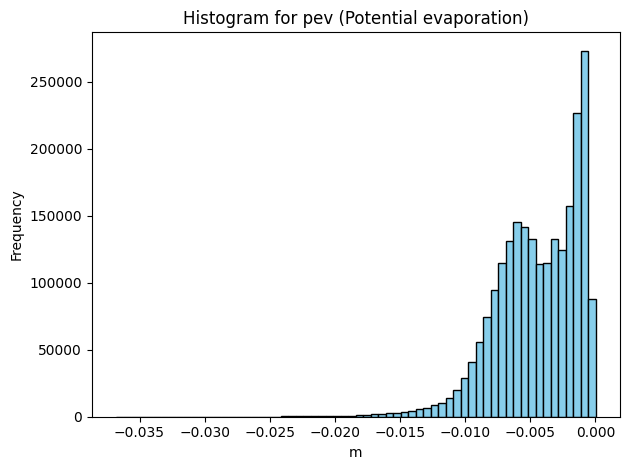

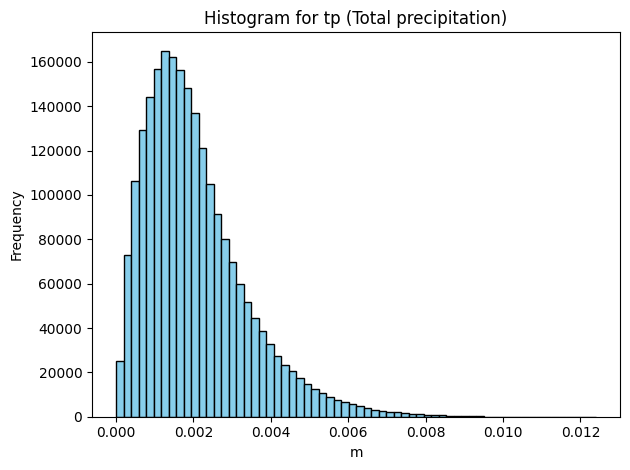

In [134]:
# Histogram for a single variable (e.g., 't2m')
# This will flatten all dimensions (time, latitude, longitude) and create a histogram.
# ds['t2m'].plot.hist(bins=50) # 'bins' specifies the number of histogram intervals
# plt.title('Histogram for 2m Temperature (t2m)')
# plt.xlabel('Temperature (your unit, e.g., K or °C)')
# plt.ylabel('Frequency')
# plt.show()

# 2. Histogram for each variable:
for var_name in ds.data_vars:
    plt.figure()
    ds[var_name].plot.hist(
        bins=64,
        color="skyblue",  # bar color
        edgecolor="black"  # outline color
    )
    plt.title(f'Histogram for {var_name} ({ds[var_name].attrs.get("long_name", var_name)})')
    plt.xlabel(f'{ds[var_name].attrs.get("units", "Unknown unit")}')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


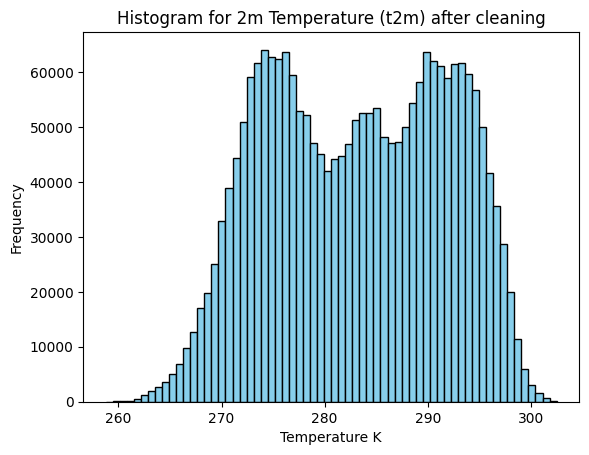

In [135]:
data_valid.plot.hist(
    bins=64,
    color="skyblue",   # bar color
    edgecolor="black"  # outline color
)
plt.title('Histogram for 2m Temperature (t2m) after cleaning')
plt.xlabel('Temperature K')
plt.ylabel('Frequency')
plt.show()


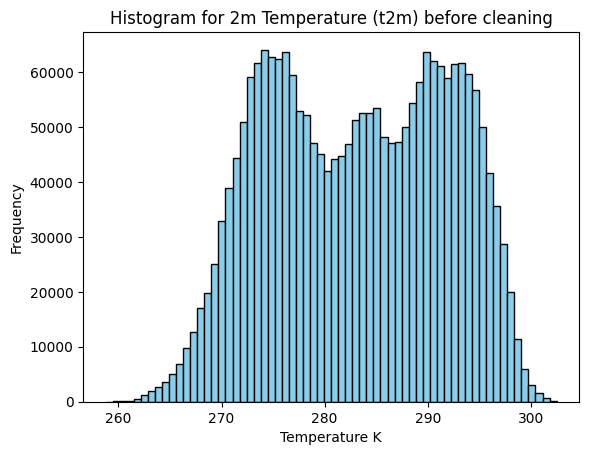

In [136]:
ds['t2m'].plot.hist(
    bins=64,
    color="skyblue",   # bar color
    edgecolor="black"  # outline color
)
plt.title('Histogram for 2m Temperature (t2m) before cleaning')
plt.xlabel('Temperature K')
plt.ylabel('Frequency')
plt.show()


In [137]:
has_nans = data_valid.isnull().any()

print(f"t2m: {'has nule values' if has_nans else 'no nule values'}")

t2m: no nule values


In [138]:
print(data_valid.dims)

('valid_time', 'points')


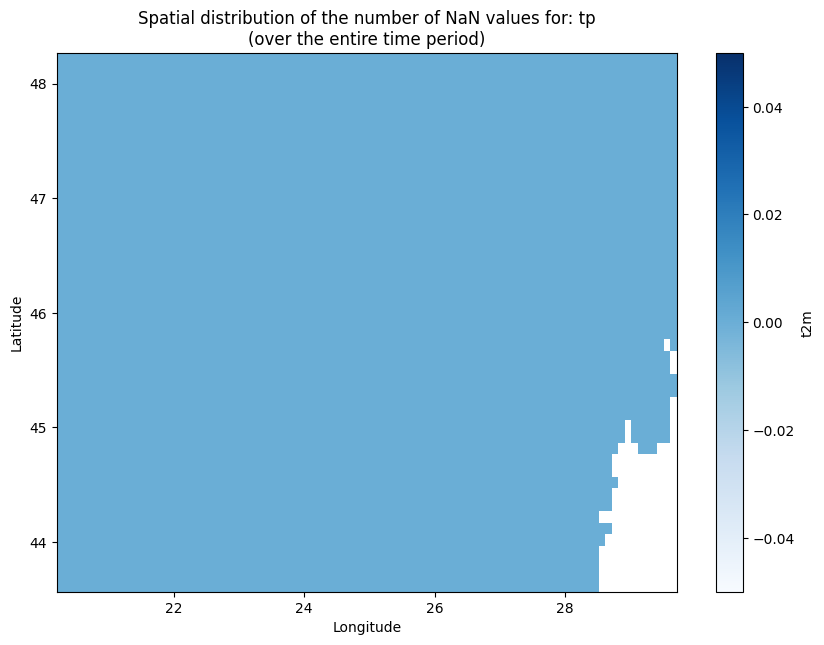

In [139]:
# Number of NaNs for each grid point
spatial_nan_frequency = data_valid.isnull().sum(dim='valid_time')

# Reconstruct the 2D grid
spatial_nan_frequency_2d = spatial_nan_frequency.unstack('points')

# Correct plot
plt.figure(figsize=(10, 7))
spatial_nan_frequency_2d.plot(cmap='Blues')
plt.title(f'Spatial distribution of the number of NaN values for: {var_name}\n(over the entire time period)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

After the cleaning process, all regions containing NaN values were completely removed from the dataset.

In [140]:
print(spatial_nan_frequency_2d.values[:5, :5])


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [141]:
# Create the mask once (based on t2m)
valid_mask = ~np.isnan(ds['t2m']).all(dim='valid_time')

# Apply the mask to all variables in the dataset
ds_valid = ds.where(valid_mask)

In [142]:
ds_valid

<xarray.Dataset> Size: 47MB
Dimensions:     (valid_time: 528, latitude: 47, longitude: 95)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 4kB 1981-01-01 ... 2024-12-01
  * latitude    (latitude) float64 376B 48.22 48.12 48.02 ... 43.82 43.72 43.62
  * longitude   (longitude) float64 760B 20.26 20.36 20.46 ... 29.46 29.56 29.66
    expver      (valid_time) <U4 8kB ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 9MB 268.4 ... nan
    swvl1       (valid_time, latitude, longitude) float32 9MB 0.4676 ... nan
    ssrd        (valid_time, latitude, longitude) float32 9MB 5.311e+06 ... nan
    pev         (valid_time, latitude, longitude) float32 9MB -0.0009523 ... nan
    tp          (valid_time, latitude, longitude) float32 9MB 0.0008834 ... nan
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-12T09:38 GRIB to CDM+CF via cfgrib-0.9.1...

In [143]:
vars_processed = {}

for var_name in ds.data_vars:
    # 1. Create the mask based on the variable itself
    valid_mask = ~np.isnan(ds[var_name]).all(dim='valid_time')

    # 2. Apply the spatial mask (keep only valid points)
    valid_points = ds[var_name].where(valid_mask)

    # 3. Stack and remove completely empty points
    data_valid = valid_points.stack(points=("latitude", "longitude")).dropna(dim="points", how="all")

    # 4. Save the result
    vars_processed[var_name] = data_valid

# Create a new Dataset with all processed variables
ds_valid = xr.Dataset(vars_processed)

In [144]:
for var_name in ds_valid.data_vars:
    var_data = ds_valid[var_name]
    num_nan = var_data.isnull().sum().item()
    total = var_data.size
    print(f"{var_name}: {num_nan} NaN out of {total} total values ({100 * num_nan / total:.2f}%)")


t2m: 0 NaN out of 2280960 total values (0.00%)
swvl1: 0 NaN out of 2280960 total values (0.00%)
ssrd: 0 NaN out of 2280960 total values (0.00%)
pev: 0 NaN out of 2280960 total values (0.00%)
tp: 0 NaN out of 2280960 total values (0.00%)


In [145]:
ds_valid

<xarray.Dataset> Size: 46MB
Dimensions:     (valid_time: 528, points: 4320)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 4kB 1981-01-01 ... 2024-12-01
    expver      (valid_time) <U4 8kB '0001' '0001' '0001' ... '0001' '0001'
  * points      (points) object 35kB MultiIndex
  * latitude    (points) float64 35kB 48.22 48.22 48.22 ... 43.62 43.62 43.62
  * longitude   (points) float64 35kB 20.26 20.36 20.46 ... 28.26 28.36 28.46
Data variables:
    t2m         (valid_time, points) float32 9MB 268.4 268.3 ... 279.0 279.5
    swvl1       (valid_time, points) float32 9MB 0.4676 0.4691 ... 0.3565 0.354
    ssrd        (valid_time, points) float32 9MB 5.311e+06 ... 4.051e+06
    pev         (valid_time, points) float32 9MB -0.0009523 ... -0.001776
    tp          (valid_time, points) float32 9MB 0.0008834 ... 0.002575

In [146]:
ds_valid['t2m']

<xarray.DataArray 't2m' (valid_time: 528, points: 4320)> Size: 9MB
array([[268.41968, 268.31738, 268.30322, ..., 273.13574, 273.7517 ,
        274.36206],
       [272.57983, 272.42065, 272.3374 , ..., 275.2744 , 275.76636,
        276.20996],
       [279.07007, 278.8545 , 278.78687, ..., 279.48975, 279.66138,
        279.8518 ],
       ...,
       [282.67114, 282.5747 , 282.57202, ..., 286.76123, 287.1787 ,
        287.5874 ],
       [275.0459 , 274.97534, 274.9541 , ..., 280.05298, 280.65332,
        281.24902],
       [274.2517 , 274.18677, 274.17578, ..., 278.51   , 279.021  ,
        279.5288 ]], dtype=float32)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 4kB 1981-01-01 ... 2024-12-01
    expver      (valid_time) <U4 8kB '0001' '0001' '0001' ... '0001' '0001'
  * points      (points) object 35kB MultiIndex
  * latitude    (points) float64 35kB 48.22 48.22 48.22 ... 43.62 43.62 43.62
  * longitude   (points) float64 35kB 20.26 20.36 20.46 ... 28.26 28.36 28.46
Attributes: (12/31)
    GRIB_paramId:                             167
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      4465
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_gridType:                            regular_ll
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [147]:
ds_valid.data_vars


Data variables:
    t2m      (valid_time, points) float32 9MB 268.4 268.3 268.3 ... 279.0 279.5
    swvl1    (valid_time, points) float32 9MB 0.4676 0.4691 ... 0.3565 0.354
    ssrd     (valid_time, points) float32 9MB 5.311e+06 5.306e+06 ... 4.051e+06
    pev      (valid_time, points) float32 9MB -0.0009523 ... -0.001776
    tp       (valid_time, points) float32 9MB 0.0008834 0.0008555 ... 0.002575

In [148]:
ds_valid.coords


Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 4kB 1981-01-01 ... 2024-12-01
    expver      (valid_time) <U4 8kB '0001' '0001' '0001' ... '0001' '0001'
  * points      (points) object 35kB MultiIndex
  * latitude    (points) float64 35kB 48.22 48.22 48.22 ... 43.62 43.62 43.62
  * longitude   (points) float64 35kB 20.26 20.36 20.46 ... 28.26 28.36 28.46

In [149]:
for var_name in ds_valid.data_vars:
    var_data = ds_valid[var_name]
    has_nans = var_data.isnull().any()

    print(f"{var_name}: {'has nule values' if has_nans else 'no nule values'}")


t2m: no nule values
swvl1: no nule values
ssrd: no nule values
pev: no nule values
tp: no nule values


In [150]:
for var_name in ds_valid.data_vars:
    var_data = ds_valid[var_name]
    missing_mask = var_data.isnull()

    if missing_mask.any():
        example = missing_mask.where(missing_mask, drop=True).isel(valid_time=0)
        print(f"\n{var_name}: has nule values. Example:{example}")


In [151]:
print(ds_valid['t2m'].isel(valid_time=0))


<xarray.DataArray 't2m' (points: 4320)> Size: 17kB
array([268.41968, 268.31738, 268.30322, ..., 273.13574, 273.7517 ,
       274.36206], dtype=float32)
Coordinates:
    number      int64 8B 0
    valid_time  datetime64[ns] 8B 1981-01-01
    expver      <U4 16B '0001'
  * points      (points) object 35kB MultiIndex
  * latitude    (points) float64 35kB 48.22 48.22 48.22 ... 43.62 43.62 43.62
  * longitude   (points) float64 35kB 20.26 20.36 20.46 ... 28.26 28.36 28.46
Attributes: (12/31)
    GRIB_paramId:                             167
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      4465
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_gridType:                            regular_ll
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre

In [152]:
for var_name in ds_valid.data_vars:
    var_data = ds_valid[var_name]
    missing_mask = var_data.isnull()

    if missing_mask.any():
        example_coords = missing_mask.where(missing_mask, drop=True).stack(z=missing_mask.dims).squeeze().dropna(
            dim='z').isel(z=0)
        coords_dict = {dim: example_coords[dim].item() for dim in example_coords.dims}

        print(f"\n{var_name}: has nule values at:")
        print(coords_dict)
        print("Value in selected point:")
        print(var_data.sel(**coords_dict))

In [153]:
print("Min:", ds_valid['t2m'].min().item())
print("Max:", ds_valid['t2m'].max().item())

Min: 258.770263671875
Max: 302.4892578125


In [154]:
# Temperature: K → °C
ds_valid['t2m'] = ds_valid['t2m'] - 273.15
ds_valid['t2m'].attrs['units'] = '°C'

In [155]:
print("Min:", ds_valid['t2m'].min().item())
print("Max:", ds_valid['t2m'].max().item())

Min: -14.379730224609375
Max: 29.339263916015625


In [156]:
print(ds_valid['t2m'].isel(valid_time=0))

<xarray.DataArray 't2m' (points: 4320)> Size: 17kB
array([-4.730316  , -4.832611  , -4.8467712 , ..., -0.01425171,
        0.6017151 ,  1.2120667 ], dtype=float32)
Coordinates:
    number      int64 8B 0
    valid_time  datetime64[ns] 8B 1981-01-01
    expver      <U4 16B '0001'
  * points      (points) object 35kB MultiIndex
  * latitude    (points) float64 35kB 48.22 48.22 48.22 ... 43.62 43.62 43.62
  * longitude   (points) float64 35kB 20.26 20.36 20.46 ... 28.26 28.36 28.46
Attributes:
    units:    °C


**t2m (2 metre temperature)**

  Original units: Kelvin (K).
  Converted to: degrees Celsius (°C) by subtracting 273.15.

In [157]:
ds_valid['swvl1'].attrs['units']

'm**3 m**-3'

**swvl1 (Volumetric soil water layer 1)**

  Original units: m³/m³.
  No conversion needed.

In [158]:
july = ds_valid['ssrd'].sel(valid_time=ds_valid['valid_time'].dt.month==7).mean().values
jan = ds_valid['ssrd'].sel(valid_time=ds_valid['valid_time'].dt.month==1).mean().values
print("July mean:", july)
print("January mean:", jan)


July mean: 21020710.0
January mean: 4909738.5


In [159]:
# days_in_month = ds_valid['valid_time'].dt.days_in_month
ds_valid['ssrd'] = ds_valid['ssrd'] / (24 * 3600)
ds_valid['ssrd'].attrs['units'] = 'W/m²'

In the ERA5-Land dataset (`monthly_averaged_reanalysis`), the variable **SSRD** is provided as
**"monthly mean of daily sums"** with units reported as `J/m² per day`.

- To convert from **J/m² per day** to a continuous flux (**W/m²**),
  we divide by the number of seconds in a day (**86,400 s/day**).

- Typical ranges at mid-latitudes (~48°N) are:
  - **~30–70 W/m² in winter**
  - **~150–300 W/m² in summer**

In [160]:
# Potential evaporation: m per month (negative) → mm/month (positive)
ds_valid['pev'] = -ds_valid['pev'] * 1000
ds_valid['pev'].attrs['units'] = 'mm/day'

**pev (Potential evaporation)**

  Original units: m (daily mean accumulated in meters, negative convention for upward flux).
  Converted to: mm/day, with sign inverted to represent positive evaporation.

In [161]:
# Total precipitation: m per month → mm/month
ds_valid['tp'] = ds_valid['tp'] * 1000
ds_valid['tp'].attrs['units'] = 'mm/day'

**tp (Total precipitation)**

  Original units: m (daily mean accumulated in meters).
  Converted to: mm/day for easier interpretation.

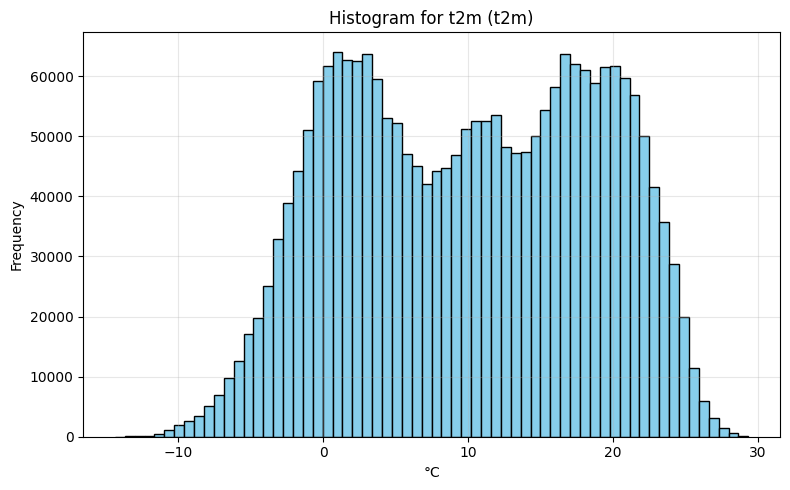

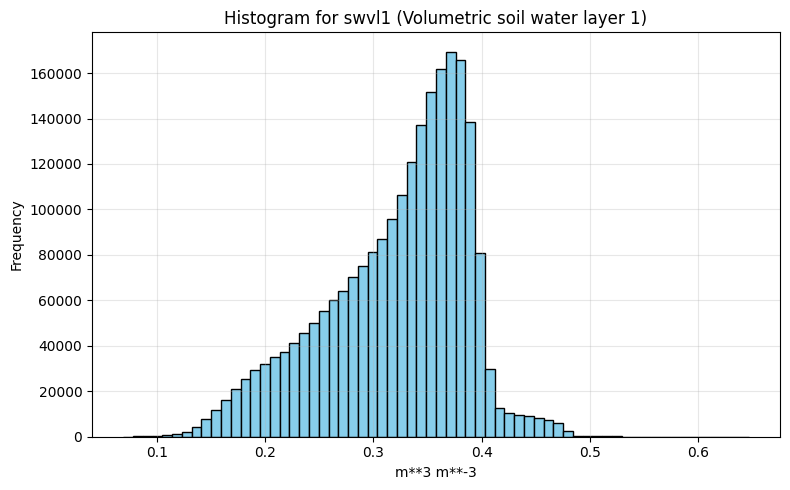

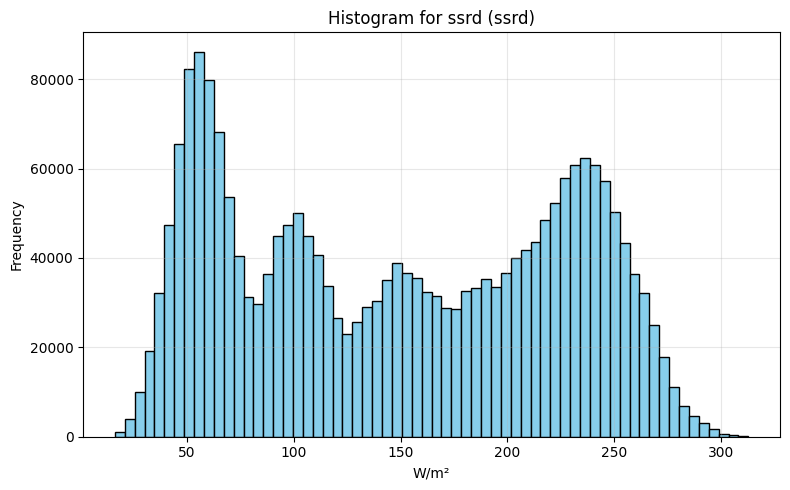

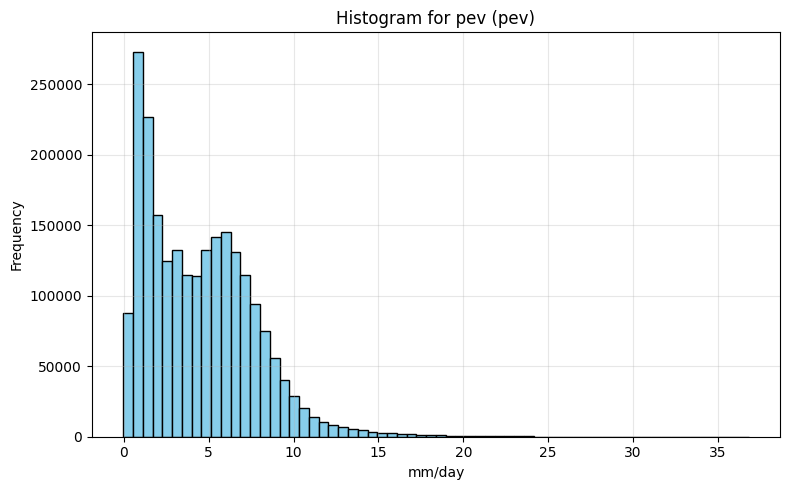

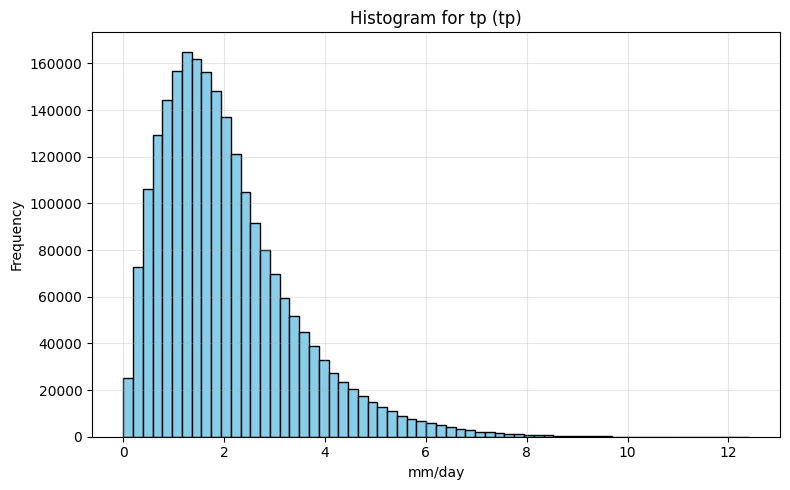

In [162]:
for var_name in ds_valid.data_vars:
    plt.figure(figsize=(8, 5))
    ds_valid[var_name].plot.hist(
        bins=64,
        color="skyblue",
        edgecolor="black"
    )
    plt.title(f'Histogram for {var_name} ({ds_valid[var_name].attrs.get("long_name", var_name)})')
    plt.xlabel(f'{ds_valid[var_name].attrs.get("units", "Unknown unit")}')
    plt.ylabel('Frequency')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


## Interpretation of ERA5 Variable Histograms

This section provides an interpretation of histograms generated from selected ERA5 monthly averaged variables. The values represent spatially aggregated climate data for a mid-latitude region (~48°N).

---

### `t2m` – 2-meter Air Temperature (°C)
- **Range:** Approximately -15°C to +30°C
- **Distribution:** Bimodal
- **Interpretation:** The two peaks reflect seasonal contrast — lower temperatures in winter and higher in summer — typical for temperate climates.

---

### `swvl1` – Volumetric Soil Water Layer 1 (m³/m³)
- **Range:** Approximately 0.1 to 0.6 m³/m³
- **Distribution:** Right-skewed, peak near 0.35–0.4
- **Interpretation:** Indicates generally moderate to high soil moisture, consistent with humid regions or irrigated agricultural land. All values fall within the expected physical range (0–1 m³/m³).

---

### `ssrd` – Surface Solar Radiation Downwards (W/m²)
- **Range:** Approximately 15 to 300 W/m².
- **Distribution:** Multi-modal, reflecting strong seasonal differences in incoming solar energy.

- Although the raw `ssrd` values are stored in units of `J/m² per day`, dividing by the number of seconds in a day (**86,400 s**) converts them into continuous fluxes (**W/m²**).
- The temporal resolution remains monthly, but the units now reflect a **mean radiative power rate** averaged over all hours of each month.


---

### `pev` – Potential Evaporation (mm/day)
- **Range:** 0 to ~35 mm/day
- **Distribution:** Strongly right-skewed, peak below 10 mm/day
- **Interpretation:** Many low-evaporation cases are likely due to cold seasons, cloud cover, or humid conditions. A small number of higher values occur in warm or dry months.

---

### `tp` – Total Precipitation (mm/day)
- **Range:** 0 to ~12 mm/day
- **Distribution:** Right-skewed, concentrated below 5 mm/day
- **Interpretation:** Most grid cells experience low to moderate daily rainfall, possibly reflecting dry-season conditions or generally arid regions. Distribution is typical for large-scale climatological precipitation data.


In [163]:
# Loop through all data variables in the dataset
for var_name in ds_valid.data_vars:
    var = ds_valid[var_name]

    # Compute min and max while ignoring NaN values
    var_min = float(var.min(skipna=True).values)
    var_max = float(var.max(skipna=True).values)

    # Get units from variable attributes, if available
    units = var.attrs.get('units', 'unknown')

    # Print summary
    print(f"{var_name}:")
    print(f"  Min: {var_min:.3f} {units}")
    print(f"  Max: {var_max:.3f} {units}")
    print()


t2m:
  Min: -14.380 °C
  Max: 29.339 °C

swvl1:
  Min: 0.069 m**3 m**-3
  Max: 0.647 m**3 m**-3

ssrd:
  Min: 16.311 W/m²
  Max: 312.686 W/m²

pev:
  Min: -0.040 mm/day
  Max: 36.812 mm/day

tp:
  Min: 0.003 mm/day
  Max: 12.401 mm/day



In [164]:
# Select the 'pev' variable
pev = ds_valid['pev']

# Count how many values are strictly less than 0
num_negative = (pev < 0).sum().item()

print(f"Number of values below 0 in 'pev': {num_negative}")

Number of values below 0 in 'pev': 380


In [165]:
ds_valid['pev'].values = np.clip(ds_valid['pev'].values, 0, None)

In [166]:
# Loop through all data variables in the dataset
for var_name in ds_valid.data_vars:
    var = ds_valid[var_name]

    # Compute min and max while ignoring NaN values
    var_min = float(var.min(skipna=True).values)
    var_max = float(var.max(skipna=True).values)

    # Get units from variable attributes, if available
    units = var.attrs.get('units', 'unknown')

    # Print summary
    print(f"{var_name}:")
    print(f"  Min: {var_min:.3f} {units}")
    print(f"  Max: {var_max:.3f} {units}")
    print()

t2m:
  Min: -14.380 °C
  Max: 29.339 °C

swvl1:
  Min: 0.069 m**3 m**-3
  Max: 0.647 m**3 m**-3

ssrd:
  Min: 16.311 W/m²
  Max: 312.686 W/m²

pev:
  Min: 0.000 mm/day
  Max: 36.812 mm/day

tp:
  Min: 0.003 mm/day
  Max: 12.401 mm/day



In [172]:
ds_reset = ds_valid.reset_index("points")
ds_reset.to_netcdf("../data/processed/preprocessed_data.nc")

In [173]:
ds = load_dataset(file_path="../data/processed/preprocessed_data.nc")
print(ds)


<xarray.Dataset> Size: 55MB
Dimensions:     (valid_time: 528, points: 4320)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 4kB 1981-01-01 ... 2024-12-01
    expver      (valid_time) <U4 8kB ...
    latitude    (points) float64 35kB ...
    longitude   (points) float64 35kB ...
Dimensions without coordinates: points
Data variables:
    t2m         (valid_time, points) float32 9MB ...
    swvl1       (valid_time, points) float32 9MB ...
    ssrd        (valid_time, points) float64 18MB ...
    pev         (valid_time, points) float32 9MB ...
    tp          (valid_time, points) float32 9MB ...


In [174]:
for var_name in ds.data_vars:
    var_data = ds[var_name]
    has_nans = var_data.isnull().any()

    print(f"{var_name}: {'has nule values' if has_nans else 'no nule values'}")


t2m: no nule values
swvl1: no nule values
ssrd: no nule values
pev: no nule values
tp: no nule values


In [175]:
# Loop through all data variables in the dataset
for var_name in ds.data_vars:
    var = ds[var_name]

    # Compute min and max while ignoring NaN values
    var_min = float(var.min(skipna=True).values)
    var_max = float(var.max(skipna=True).values)

    # Get units from variable attributes, if available
    units = var.attrs.get('units', 'unknown')

    # Print summary
    print(f"{var_name}:")
    print(f"  Min: {var_min:.3f} {units}")
    print(f"  Max: {var_max:.3f} {units}")
    print()

t2m:
  Min: -14.380 °C
  Max: 29.339 °C

swvl1:
  Min: 0.069 m**3 m**-3
  Max: 0.647 m**3 m**-3

ssrd:
  Min: 16.311 W/m²
  Max: 312.686 W/m²

pev:
  Min: 0.000 mm/day
  Max: 36.812 mm/day

tp:
  Min: 0.003 mm/day
  Max: 12.401 mm/day

